In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

In [12]:
path_dir = './output'
train = './output/train'
train_vehicle = './output/train/vehicles'
train_non_vehicle = './output/train/non-vehicles'
test = './output/test'
val = './output/validation'

## Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 300),
    batch_size=4,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(150, 300),
    batch_size=2,
    shuffle=True,
    class_mode='categorical'
)

Found 12431 images belonging to 2 classes.
Found 3729 images belonging to 2 classes.


## Visualization

In [17]:
train_generator.class_indices

{'non-vehicles': 0, 'vehicles': 1}

In [15]:
x_train,y_train = train_generator.next()
print(x_train.shape,y_train.shape)

(4, 150, 300, 3) (4, 2)


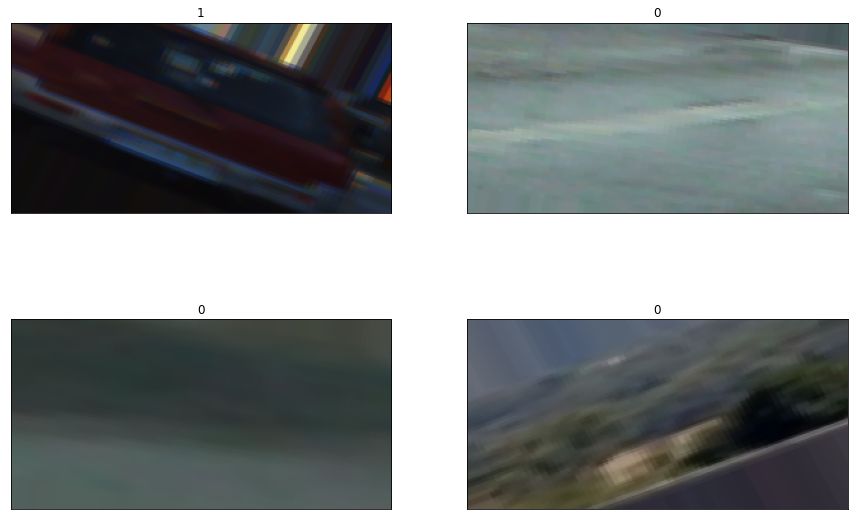

In [25]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(np.argmax(y_train[i]))

## Modelling

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[150, 300, 3]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 99, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 77616)             0         
                                                                 
 dense (Dense)               (None, 32)                2483744   
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,484,258
Trainable params: 2,484,258
Non-trainable params: 0
______________________________________________

In [28]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)